In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('admission_data_cleaned.csv')

In [3]:
df.head()

,researchExp,industryExp,toeflScore,internExp,greV,greQ,greA,ugCollege,univName,cgpa_4
0,0,24,113.0,2.0,159.0,170.0,4.0,IIT Indore,Virginia Polytechnic Institute and State Unive...,3.080
1,0,0,102.0,0.0,150.0,167.0,3.0,COEP,Virginia Polytechnic Institute and State Unive...,3.212
2,12,24,111.0,4.0,158.0,170.0,4.5,NIT Rourkela,Virginia Polytechnic Institute and State Unive...,3.648
3,0,0,111.0,1.0,152.0,161.0,4.0,SRM,Virginia Polytechnic Institute and State Unive...,3.640
4,0,27,105.0,0.0,154.0,165.0,3.5,NIT-warangal,Virginia Polytechnic Institute and State Unive...,2.804


# Undergraduate Colleges data

In [4]:
# Number of different Undergraduate colleges
df['ugCollege'].nunique()

980

In [5]:
df['ugCollege'].value_counts()

VTU                                  703
MU                                   673
Anna University                      406
Pune University                      275
JNTU                                 258
                                    ... 
ANITS                                  1
GBTU(UPTU)                             1
P.R.E.C. LONI                          1
K.C.College                            1
University of Southern California      1
Name: ugCollege, Length: 980, dtype: int64

# Since there are 980 different UG Colleges, they will add alot of dimensions to the data after one-hot encoding. So, they are not considered as a feature.

In [6]:
# remove ugCollege from dataset
df = df.drop('ugCollege',axis=1)

In [7]:
################################################################################################################################

# Number of admits per University

In [8]:
# Number of universities (classes)
df['univName'].nunique()

36

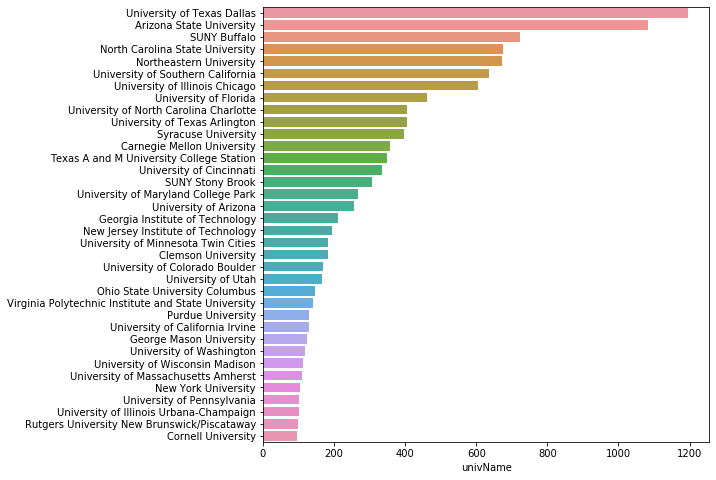

In [9]:
# Number of entries in each class
entries = df['univName'].value_counts()
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=entries,y=entries.index, ax=ax)

# From the plot, we observe that the dataset is imbalanced

In [10]:
################################################################################################################################

# Average of parameters for each university

In [11]:
avg_per_university = df.groupby('univName', as_index=False)['greQ','greV','greA','cgpa_4','toeflScore','researchExp','industryExp','internExp'].mean()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [12]:
avg_per_university

,univName,greQ,greV,greA,cgpa_4,toeflScore,researchExp,industryExp,internExp
0,Arizona State University,163.384686,152.344096,3.543819,3.177413,104.794280,0.797048,6.448339,0.671587
1,Carnegie Mellon University,164.400560,156.212885,3.893557,3.145430,110.142857,0.848739,5.722689,0.602241
2,Clemson University,162.467033,152.901099,3.598901,2.988189,105.626374,0.692308,6.829670,0.703297
3,Cornell University,163.742268,154.494845,3.804124,3.383207,108.783505,0.268041,4.154639,0.948454
4,George Mason University,160.040323,149.177419,3.342742,2.716762,101.000000,0.330645,4.556452,0.153226
5,Georgia Institute of Technology,165.716981,157.797170,4.007075,3.254528,111.500000,0.698113,3.773585,0.905660
6,New Jersey Institute of Technology,157.912821,147.276923,3.240000,2.705179,97.056410,0.456410,7.000000,0.682051
7,New York University,163.586538,154.403846,3.625000,3.169178,107.115385,0.788462,8.721154,1.096154
8,North Carolina State University,165.411852,155.035556,3.729630,3.210429,107.973333,0.577778,6.564444,0.850370
9,Northeastern University,160.845468,150.878158,3.457652,3.186648,103.297177,0.185736,7.707281,0.710253


Variation of greQ vs University


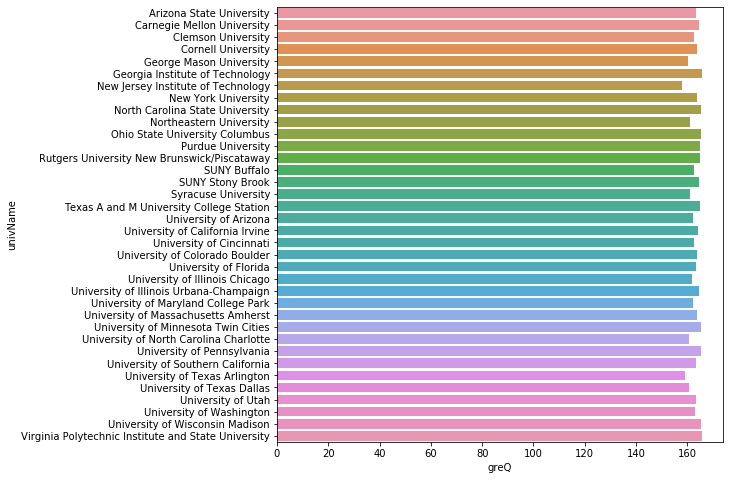

Variation of greV vs University


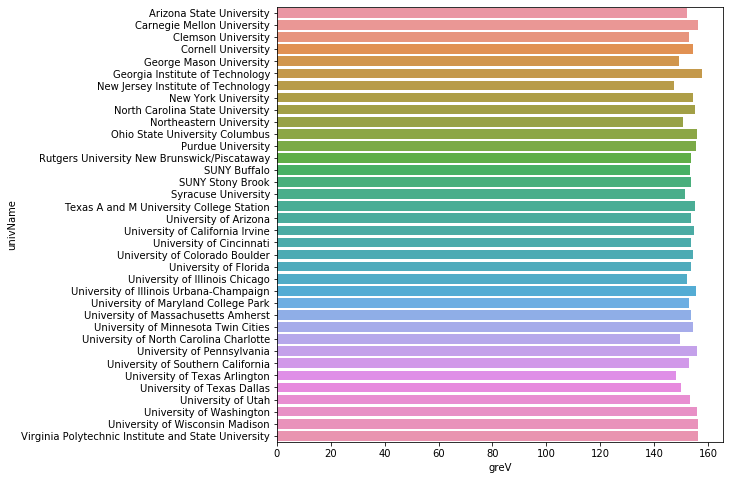

Variation of greA vs University


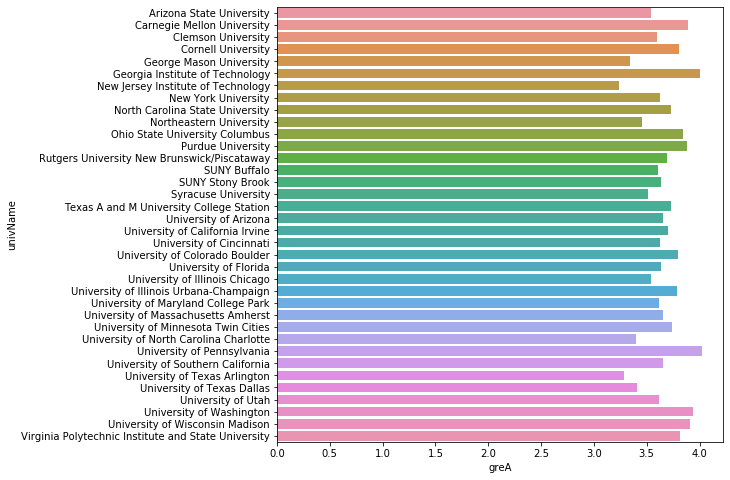

Variation of cgpa_4 vs University


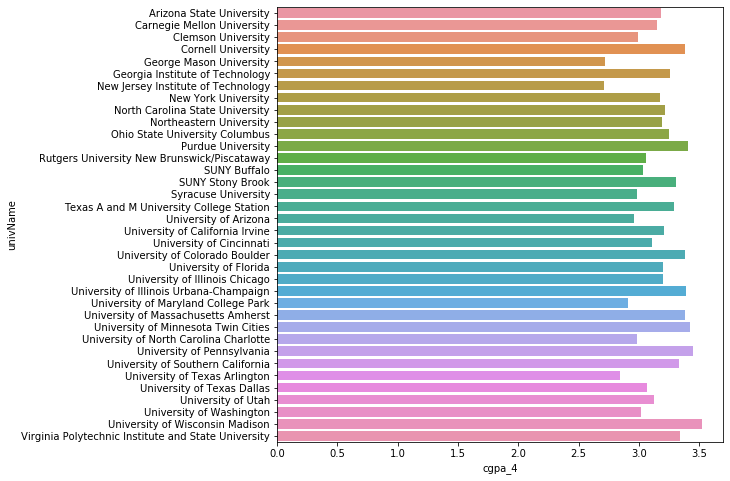

Variation of toeflScore vs University


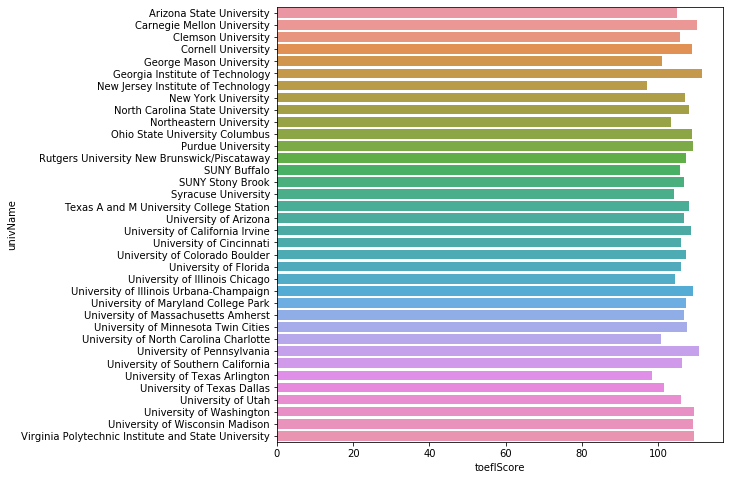

Variation of researchExp vs University


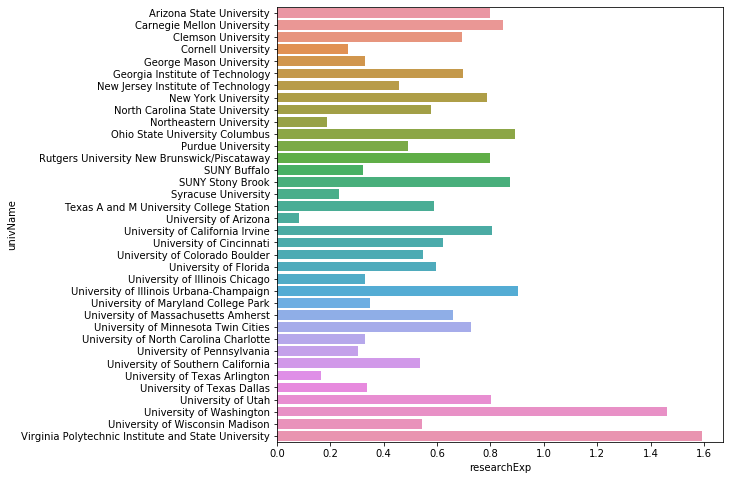

Variation of industryExp vs University


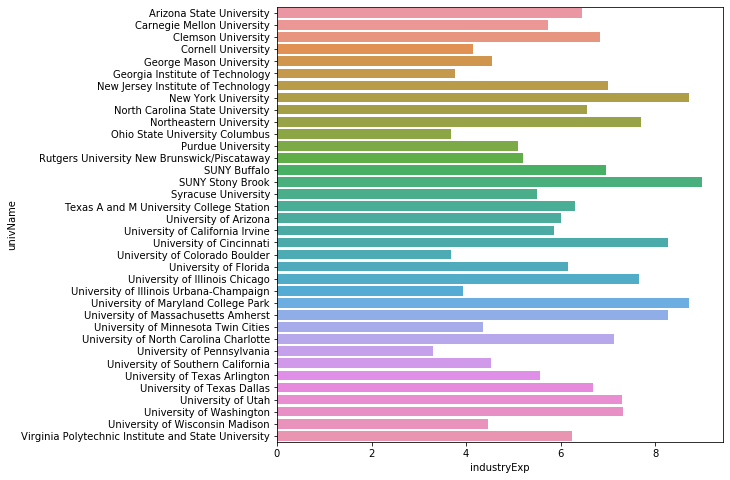

Variation of internExp vs University


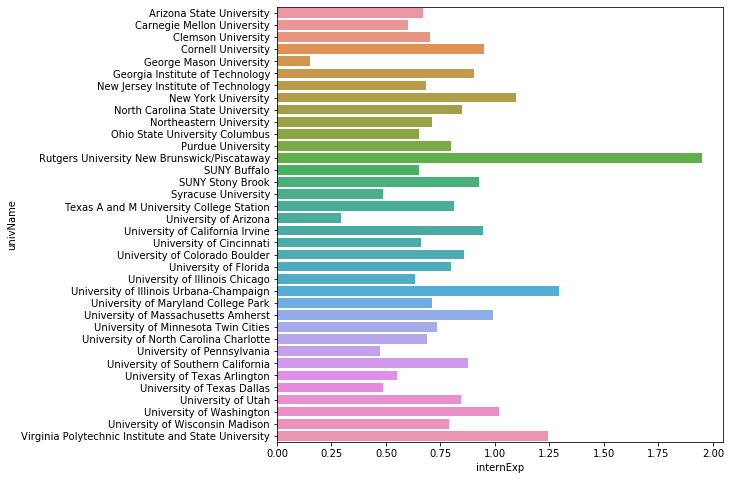

In [13]:
parameters = avg_per_university[['greQ','greV','greA','cgpa_4','toeflScore','researchExp','industryExp','internExp']]
for i in parameters.columns:
    fig_dims = (8, 8)
    fig, ax = plt.subplots(figsize=fig_dims)
    print("Variation of %s vs University" %(i))
    chart = sns.barplot(x=parameters[i],y=avg_per_university['univName'], ax=ax)
    plt.show()

# ResearchExp, IndustryExp & InternExp have alot of variation, so the data needs to be scaled

In [14]:
################################################################################################################################

In [15]:
# Remove all the wrongly entered cgpa, cgpa should be <= 4.0
df = df[df['cgpa_4']<=4]

# Visualization of parameters

# Histogram to see the distribution

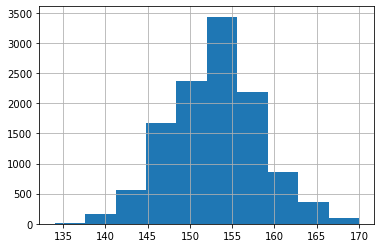

In [16]:
df.greV.hist()

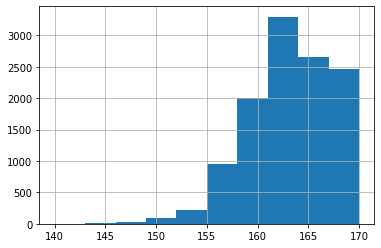

In [17]:
df.greQ.hist()

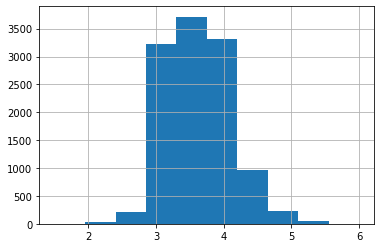

In [18]:
df.greA.hist()

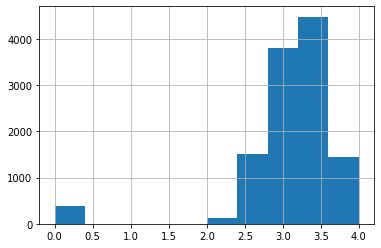

In [19]:
df.cgpa_4.hist()

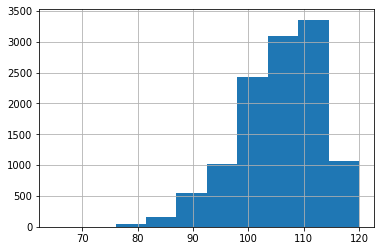

In [20]:
df.toeflScore.hist()

# These parameters have a normal distribution

In [21]:
################################################################################################################################

# Boxplots to check for outliers

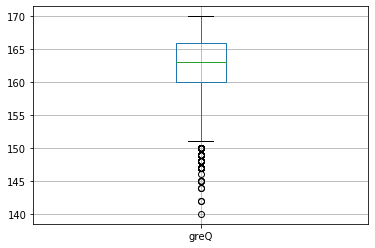

In [22]:
df.boxplot(column=['greQ'])

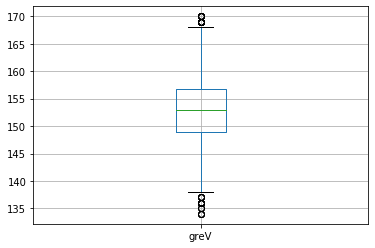

In [23]:
df.boxplot(column=['greV'])

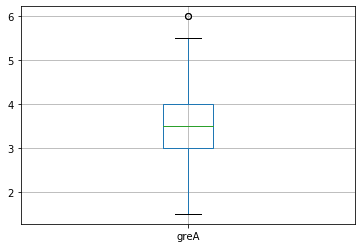

In [24]:
df.boxplot(column=['greA'])

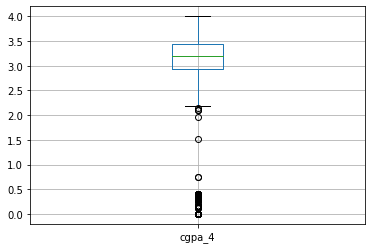

In [25]:
df.boxplot(column=['cgpa_4'])

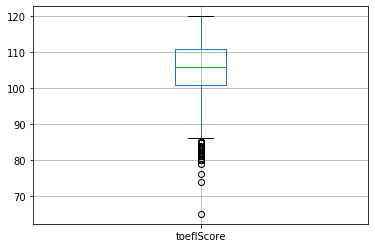

In [26]:
df.boxplot(column=['toeflScore'])

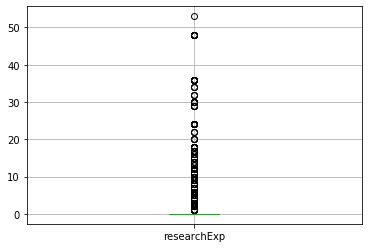

In [27]:
df.boxplot(column=['researchExp'])

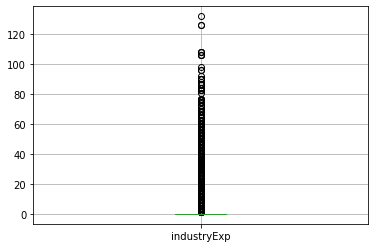

In [28]:
df.boxplot(column=['industryExp'])

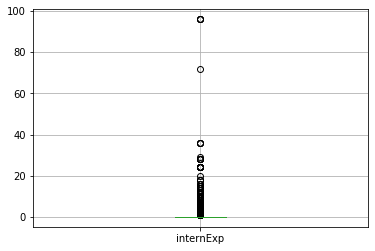

In [29]:
df.boxplot(column=['internExp'])

# There are few outliers in greQ, greV, greA, cgpa_4 & toeflScore

# ResearchExp, IndustryExp & InternExp have random distribution 

In [34]:
################################################################################################################################

In [35]:
df

,researchExp,industryExp,toeflScore,internExp,greV,greQ,greA,univName,cgpa_4
0,0,24,113.0,2.0,159.0,170.0,4.0,Virginia Polytechnic Institute and State Unive...,3.080000
1,0,0,102.0,0.0,150.0,167.0,3.0,Virginia Polytechnic Institute and State Unive...,3.212000
2,12,24,111.0,4.0,158.0,170.0,4.5,Virginia Polytechnic Institute and State Unive...,3.648000
3,0,0,111.0,1.0,152.0,161.0,4.0,Virginia Polytechnic Institute and State Unive...,3.640000
4,0,27,105.0,0.0,154.0,165.0,3.5,Virginia Polytechnic Institute and State Unive...,2.804000
...,...,...,...,...,...,...,...,...,...
11749,0,0,92.0,0.0,145.0,161.0,3.0,Arizona State University,2.989474
11750,0,0,106.0,0.0,151.0,159.0,3.5,Arizona State University,3.489600
11751,0,0,96.0,0.0,151.0,158.0,3.0,Arizona State University,3.115789
11752,0,0,113.0,0.0,159.0,163.0,3.5,Arizona State University,3.280000


In [36]:
df.describe()

,researchExp,industryExp,toeflScore,internExp,greV,greQ,greA,cgpa_4
count,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000
mean,0.521817,6.402165,105.317539,0.715016,152.790097,162.711522,3.599857,3.088968
std,3.185130,14.478641,7.520210,2.928754,5.463499,4.287230,0.541725,0.650407
min,0.000000,0.000000,65.000000,0.000000,134.000000,140.000000,1.500000,0.000000
25%,0.000000,0.000000,101.000000,0.000000,149.000000,160.000000,3.000000,2.933053
50%,0.000000,0.000000,106.000000,0.000000,153.000000,163.000000,3.500000,3.200000
75%,0.000000,0.000000,111.000000,0.000000,156.750000,166.000000,4.000000,3.436000
max,53.000000,132.000000,120.000000,96.000000,170.000000,170.000000,6.000000,4.000000


# Save the dataset for the classification model

In [37]:
df.to_csv('model_data.csv',index=False)